In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cnv_brevitas_dict = {
    "conv11": {
        "kernel": 3,
        "in": 3, 
        "out": 64,
        "dims": 30
    },  
    "conv12": {
        "kernel": 3,
        "in": 64, 
        "out": 64,
        "dims": 28
    },
    "conv21": {
        "kernel": 3,
        "in": 64, 
        "out": 128,
        "dims": 12
    },
    "conv22": {
        "kernel": 3,
        "in": 128, 
        "out": 128,
        "dims": 10
    },
    "conv31": {
        "kernel": 3,
        "in": 128, 
        "out": 256,
        "dims": 3
    },
    "conv32": {
        "kernel": 3,
        "in": 256, 
        "out": 256,
        "dims": 1
    },
    "linear1": { 
         "in": 256,
         "out": 512
    },
    "linear2": { 
         "in": 512,
         "out": 512
    },
    "linear3": { 
         "in": 512,
         "out": 2
    },
}

In [3]:
def compute_macs_and_weights(model):
    for k in model.keys():
        if "conv" in k:
            model[k].update({"mac": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
            model[k].update({"weights": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"]})
        elif "linear" in k:
            model[k].update({"mac": model[k]["in"] * model[k]["out"]})
            model[k].update({"weights": model[k]["in"] * model[k]["out"]})
        else:
            print("Wrong layer definition")

In [4]:
compute_macs_and_weights(cnv_brevitas_dict)

In [5]:
cnv_brevitas_dict

{'conv11': {'kernel': 3,
  'in': 3,
  'out': 64,
  'dims': 30,
  'mac': 1555200,
  'weights': 1728},
 'conv12': {'kernel': 3,
  'in': 64,
  'out': 64,
  'dims': 28,
  'mac': 28901376,
  'weights': 36864},
 'conv21': {'kernel': 3,
  'in': 64,
  'out': 128,
  'dims': 12,
  'mac': 10616832,
  'weights': 73728},
 'conv22': {'kernel': 3,
  'in': 128,
  'out': 128,
  'dims': 10,
  'mac': 14745600,
  'weights': 147456},
 'conv31': {'kernel': 3,
  'in': 128,
  'out': 256,
  'dims': 3,
  'mac': 2654208,
  'weights': 294912},
 'conv32': {'kernel': 3,
  'in': 256,
  'out': 256,
  'dims': 1,
  'mac': 589824,
  'weights': 589824},
 'linear1': {'in': 256, 'out': 512, 'mac': 131072, 'weights': 131072},
 'linear2': {'in': 512, 'out': 512, 'mac': 262144, 'weights': 262144},
 'linear3': {'in': 512, 'out': 2, 'mac': 1024, 'weights': 1024}}

In [6]:
cnv_brevitas_macs = {k: cnv_brevitas_dict[k]["mac"]  for k in cnv_brevitas_dict.keys()}
cnv_brevitas_weights = {k: cnv_brevitas_dict[k]["weights"]  for k in cnv_brevitas_dict.keys()}

In [7]:
cnv_brevitas_macs

{'conv11': 1555200,
 'conv12': 28901376,
 'conv21': 10616832,
 'conv22': 14745600,
 'conv31': 2654208,
 'conv32': 589824,
 'linear1': 131072,
 'linear2': 262144,
 'linear3': 1024}

Total MACs: 59457280
Total Weights: 1538752


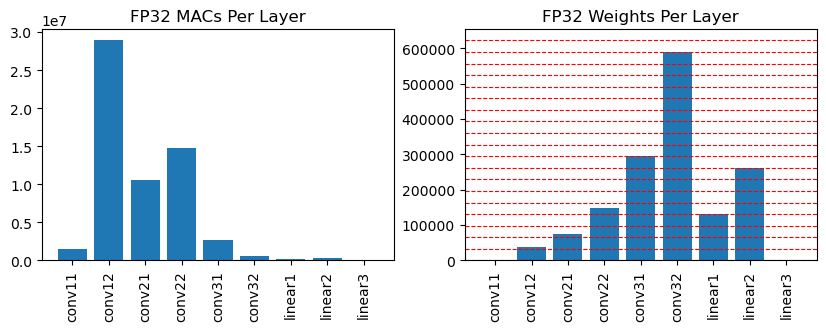

In [15]:
fp32_macs = list(cnv_brevitas_macs.values())
fp32_weights = list(cnv_brevitas_weights.values())
print(f'Total MACs: {np.array(fp32_macs).sum()}')
print(f'Total Weights: {np.array(fp32_weights).sum()}')
fp32_layers = list(cnv_brevitas_macs.keys())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

plt.subplot(1, 2, 1)
ax1.bar(fp32_layers, fp32_macs)
ax1.set_xticks(fp32_layers)
ax1.set_xticklabels(fp32_layers, rotation=90)
ax1.set_title("FP32 MACs Per Layer")

plt.subplot(1, 2, 2)
# plt.axhline(y=18432, color='r', linestyle='--')
for i in range(20):
    plt.axhline(y=32768*i, color='r', linestyle='--', lw=0.8)
ax2.bar(fp32_layers, fp32_weights)
ax2.set_xticks(fp32_layers)
ax2.set_xticklabels(fp32_layers, rotation=90)
ax2.set_title("FP32 Weights Per Layer")

plt.show()